40-60
Text box info: JEWEL2.2+PYTHIA Glauber+Bjorken
$\sqrt{s_{NN}}$ = 5.02 TeV
Anti-$k_t$ R = 0.4
158 GeV $< p_{T,1} <$ 178 GeV
$|\Delta \phi_{12}| > 7 \pi/8$, $|\eta_{1,2}| <$ 2.1 
$0-10\%$


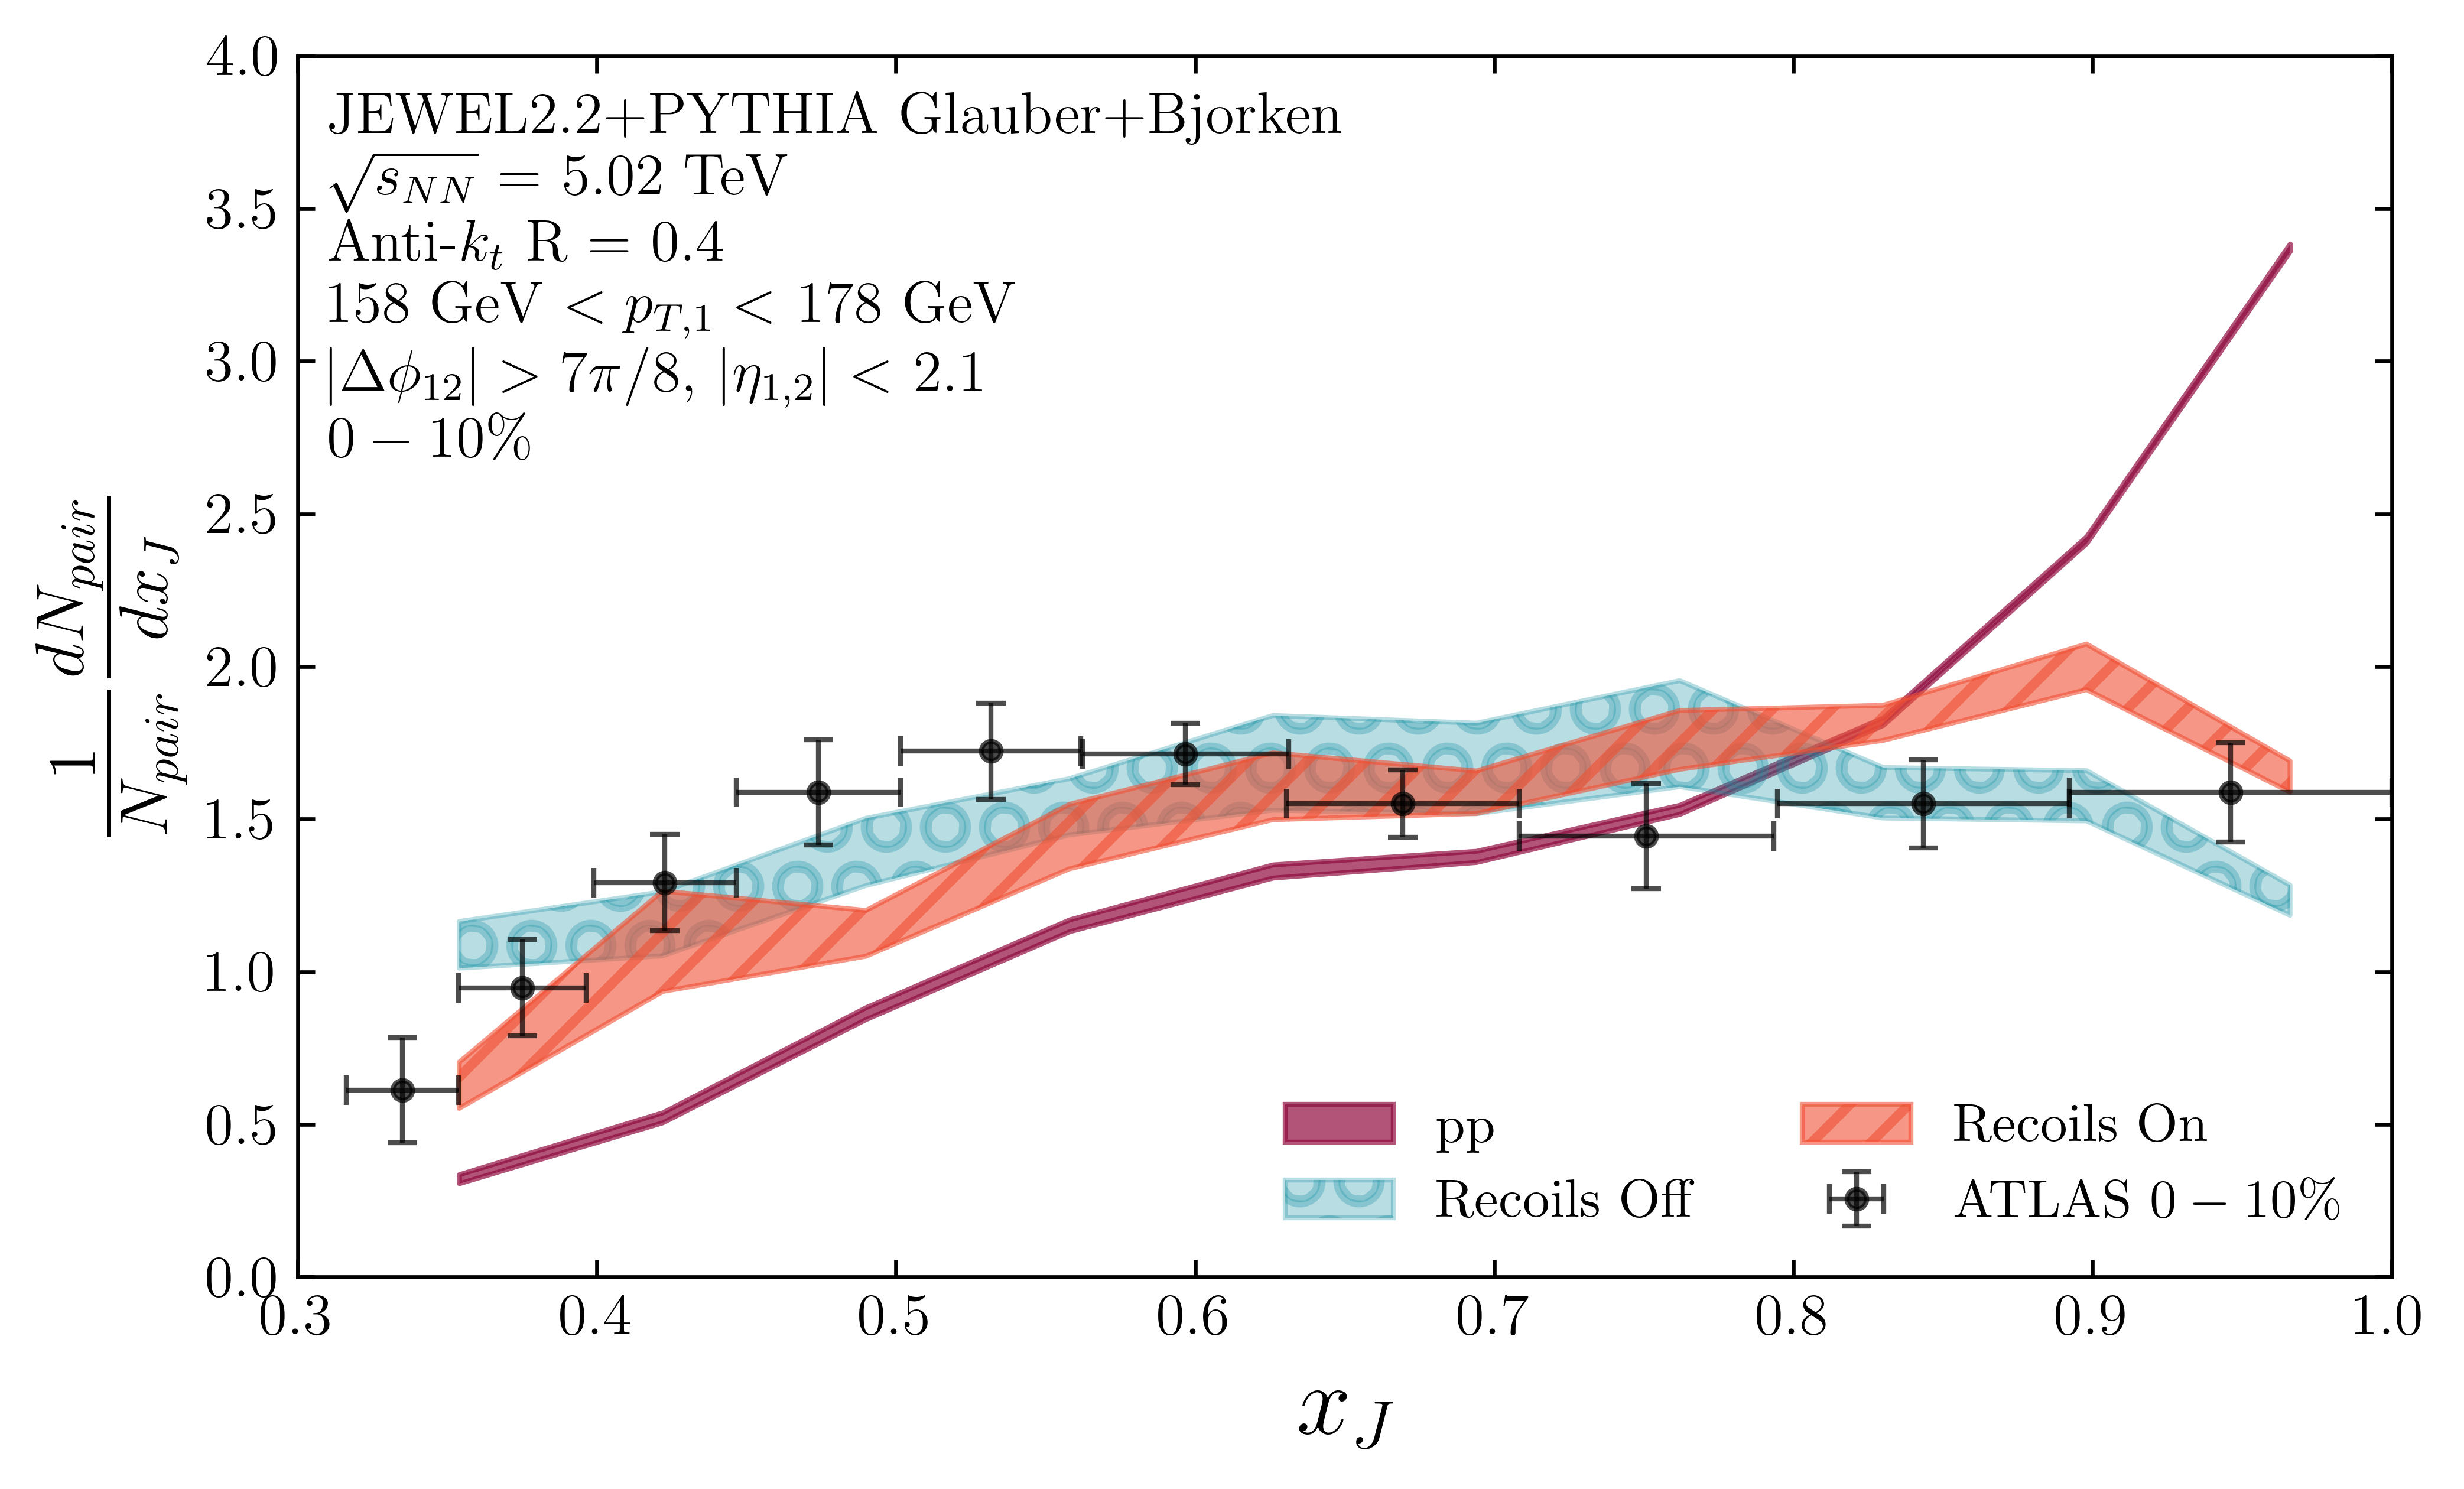

In [4]:
import sys
sys.path.append("..")

# Vn analysis, ATLAS and ALICE methods
import jetfunc
import yoda
#import rivet
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from matplotlib.ticker import AutoMinorLocator
import os

plt.style.use('plotconfig.mplstyle')


#função para fazer o gráfico dos dados experimentais do ATLAS
def DataFromExperiment(file, scatter, min = 0, max = 0):
    '''
    Grab data from the Yoda.Scatter2D named scatter from the file yoda, following
    the method that colaborations (ALICE, ATLAS, CMS) save them.

    (str, str) -> (list(np.array))
    '''
    data = yoda.read(file)[scatter]

    if max == 0:
        max = len(data.xVals()) + 1
    
    x = np.asarray(data.xVals())[min:max]
    y = np.asarray(data.yVals())[min:max]
    err = np.asarray((data.yMaxs() - data.yMins()) / 2)[min:max]
    errx = np.asarray((data.xMaxs() - data.xMins()) / 2)[min:max]
    return [x, y, err, errx]



#r = float(sys.argv[1])
#centgroup = int(sys.argv[2])
ptrange = 5
#code = str(sys.argv[4])
model = 1


#r = [0.2,0.3,0.4,0.6,0.8,1.0]
R = 0.4


#energy = os.environ['ENERGY']
#ppfile = r'yoda/pp_1503_jewel2.4_simple_raa_R' + str(r) + '.yoda'
ppfile = r'yoda/pp2_5020/pp220-5vT_raa_R'+str(R)+'.yoda'
nrebin = 2
hatchs = ['O', '//', '']
alphas = [0.3, 0.6]


# if centgroup == 1:
#     CENTS = ['0-10', '20-30', '40-50']
#     labels = ['0-10%', '20-30%', '40-50%']
#     colours = ['tab:blue', 'tab:green', 'tab:purple']
# else:
#     CENTS = ['10-20', '30-40', '50-60']
#     labels = ['10-20%', '30-40%', '50-60%']
#     colours = ['tab:orange', 'tab:red', 'tab:brown']

#CENTS = ['0-10', '10-20', '20-40', '40-60']
CENTS = ['0-10','40-60']
#labels = ['0-10%', '10-20%', '20-40%', '40-60%']
labels = ['Recoils Off', 'Recoils On']
colours = ['#1490A3', '#F05135']

#colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']


print(CENTS[1])

XJ = []
XJ.append(jetfunc.XJ(ppfile, ptrange, R, nrebin))


XJ2 = []
XJ3 = []

#OLD
#XJ2.append(jetfunc.XJ(f'yoda/simple_1603_jewel2.4_reoff_raa_R{R}.yoda', ptrange, R, nrebin))
#XJ2.append(jetfunc.XJ(f'yoda/simple_Pb_502_0-10_reon_raa_R{R}.yoda', ptrange, R, nrebin))
#NEW
XJ2.append(jetfunc.XJ(f'yoda/Dj2-5Tworec/'+str(CENTS[0])+'_raa_R'+str(R)+'.yoda', ptrange, R, nrebin))
XJ2.append(jetfunc.XJ(f'yoda/Dj2-5Twrec/'+str(CENTS[0])+'_raa_R'+str(R)+'.yoda', ptrange, R, nrebin))
#XJ2.append(jetfunc.XJ(f'yoda/Dj2-5Tworec/'+str(CENTS[1])+'_raa_R'+str(R)+'.yoda', ptrange, R, nrebin))
#XJ2.append(jetfunc.XJ(f'yoda/Dj2-5Twrec/'+str(CENTS[1])+'_raa_R'+str(R)+'.yoda', ptrange, R, nrebin))



#plt.figure(1)


plt.fill_between(XJ[0][0], XJ[0][1] - XJ[0][2], XJ[0][1] + XJ[0][2], alpha=0.7, label='pp', color='#900C3F')
for i in range(len(XJ2)):
    if i<2:
        f1 = plt.figure(1)
        plt.fill_between(XJ2[i][0], XJ2[i][1] - XJ2[i][2], XJ2[i][1] + XJ2[i][2], alpha=alphas[i], label=labels[i], color=colours[i], hatch=hatchs[i])
    else:
        f2 = plt.figure(2)
        plt.fill_between(XJ2[i][0], XJ2[i][1] - XJ2[i][2], XJ2[i][1] + XJ2[i][2], alpha=alphas[i], label=labels[i], color=colours[i], hatch=hatchs[i])
#for i in range(len(XJ3)):
#    plt.fill_between(XJ3[i][0], XJ3[i][1] - XJ3[i][2], XJ3[i][1] + XJ3[i][2], alpha=0.7, label=labels[i], color=colours[i], hatch=hatchs[model - 1])



#Plot dos dados experimentais            
ATLAS = DataFromExperiment('yoda/atlas_5T_0-10_158_178.yoda', '/REF/ATLAS_0-10/158-178')

plt.errorbar(*ATLAS, color='k', fmt='o', ms=4, elinewidth = 1., capsize = 3, capthick = 1, alpha=0.7, label='ATLAS $0-10\%$')       





# yatlas = np.asarray([0.36, 0.47, 0.45, 0.64, 0.93, 1.20, 1.50, 1.81, 2.095, 2.559])
# xatlas = np.asarray([0.33, 0.376, 0.422, 0.476, 0.526, 0.597, 0.67, 0.75, 0.85, 0.95])

# plt.errorbar(xatlas, yatlas, 0.14*yatlas, fmt='s', color='k', label='ATLAS Exp.')


plt.ylabel(r'$\frac{1}{N_{pair}}\frac{dN_{pair}}{dx_J}$', usetex=True)
plt.xlabel('$x_J$', usetex=True)
plt.ylim(0, 4.)
plt.xlim(0.3, 1.)
jetfunc.TextBoxInfo(0, str(R), XJ[0][4] + '\n' + r'$|\Delta \phi_{12}| > 7 \pi/8$, $|\eta_{1,2}| <$ 2.1 '+ '\n' + '$0-10\%$', 0, 0, model, lead=0)
plt.legend(loc=4, frameon=0, ncol=2)


#plt.savefig('Plots/xjXcentgroup' + str(centgroup) + '_R' + str(r) + '_ptrange_' + str(ptrange) + '_' + str(model) + '.pdf')
plt.savefig('Plots/newdata_xj_Dj2-5T' + '_R' + str(R) + '_ptrange_' + str(ptrange) + '_' + str(model) + '.pdf')
plt.savefig('Plots/newdata_xj_Dj2-5T' + '_R' + str(R) + '_ptrange_' + str(ptrange) + '_' + str(model) + '.png')


i =  0
i =  1
Text box info: JEWEL2.2 $\rm T_RENTo$ + vUSPhydro
$\sqrt{s_{NN}}$ = 5.02 TeV
Anti-$k_t$ R = 0.4
158 GeV $< p_{T,1} <$ 178 GeV
$|\Delta \phi_{12}| > 7 \pi/8$, $|\eta_{1,2}| <$ 2.1 
$0-10\%$


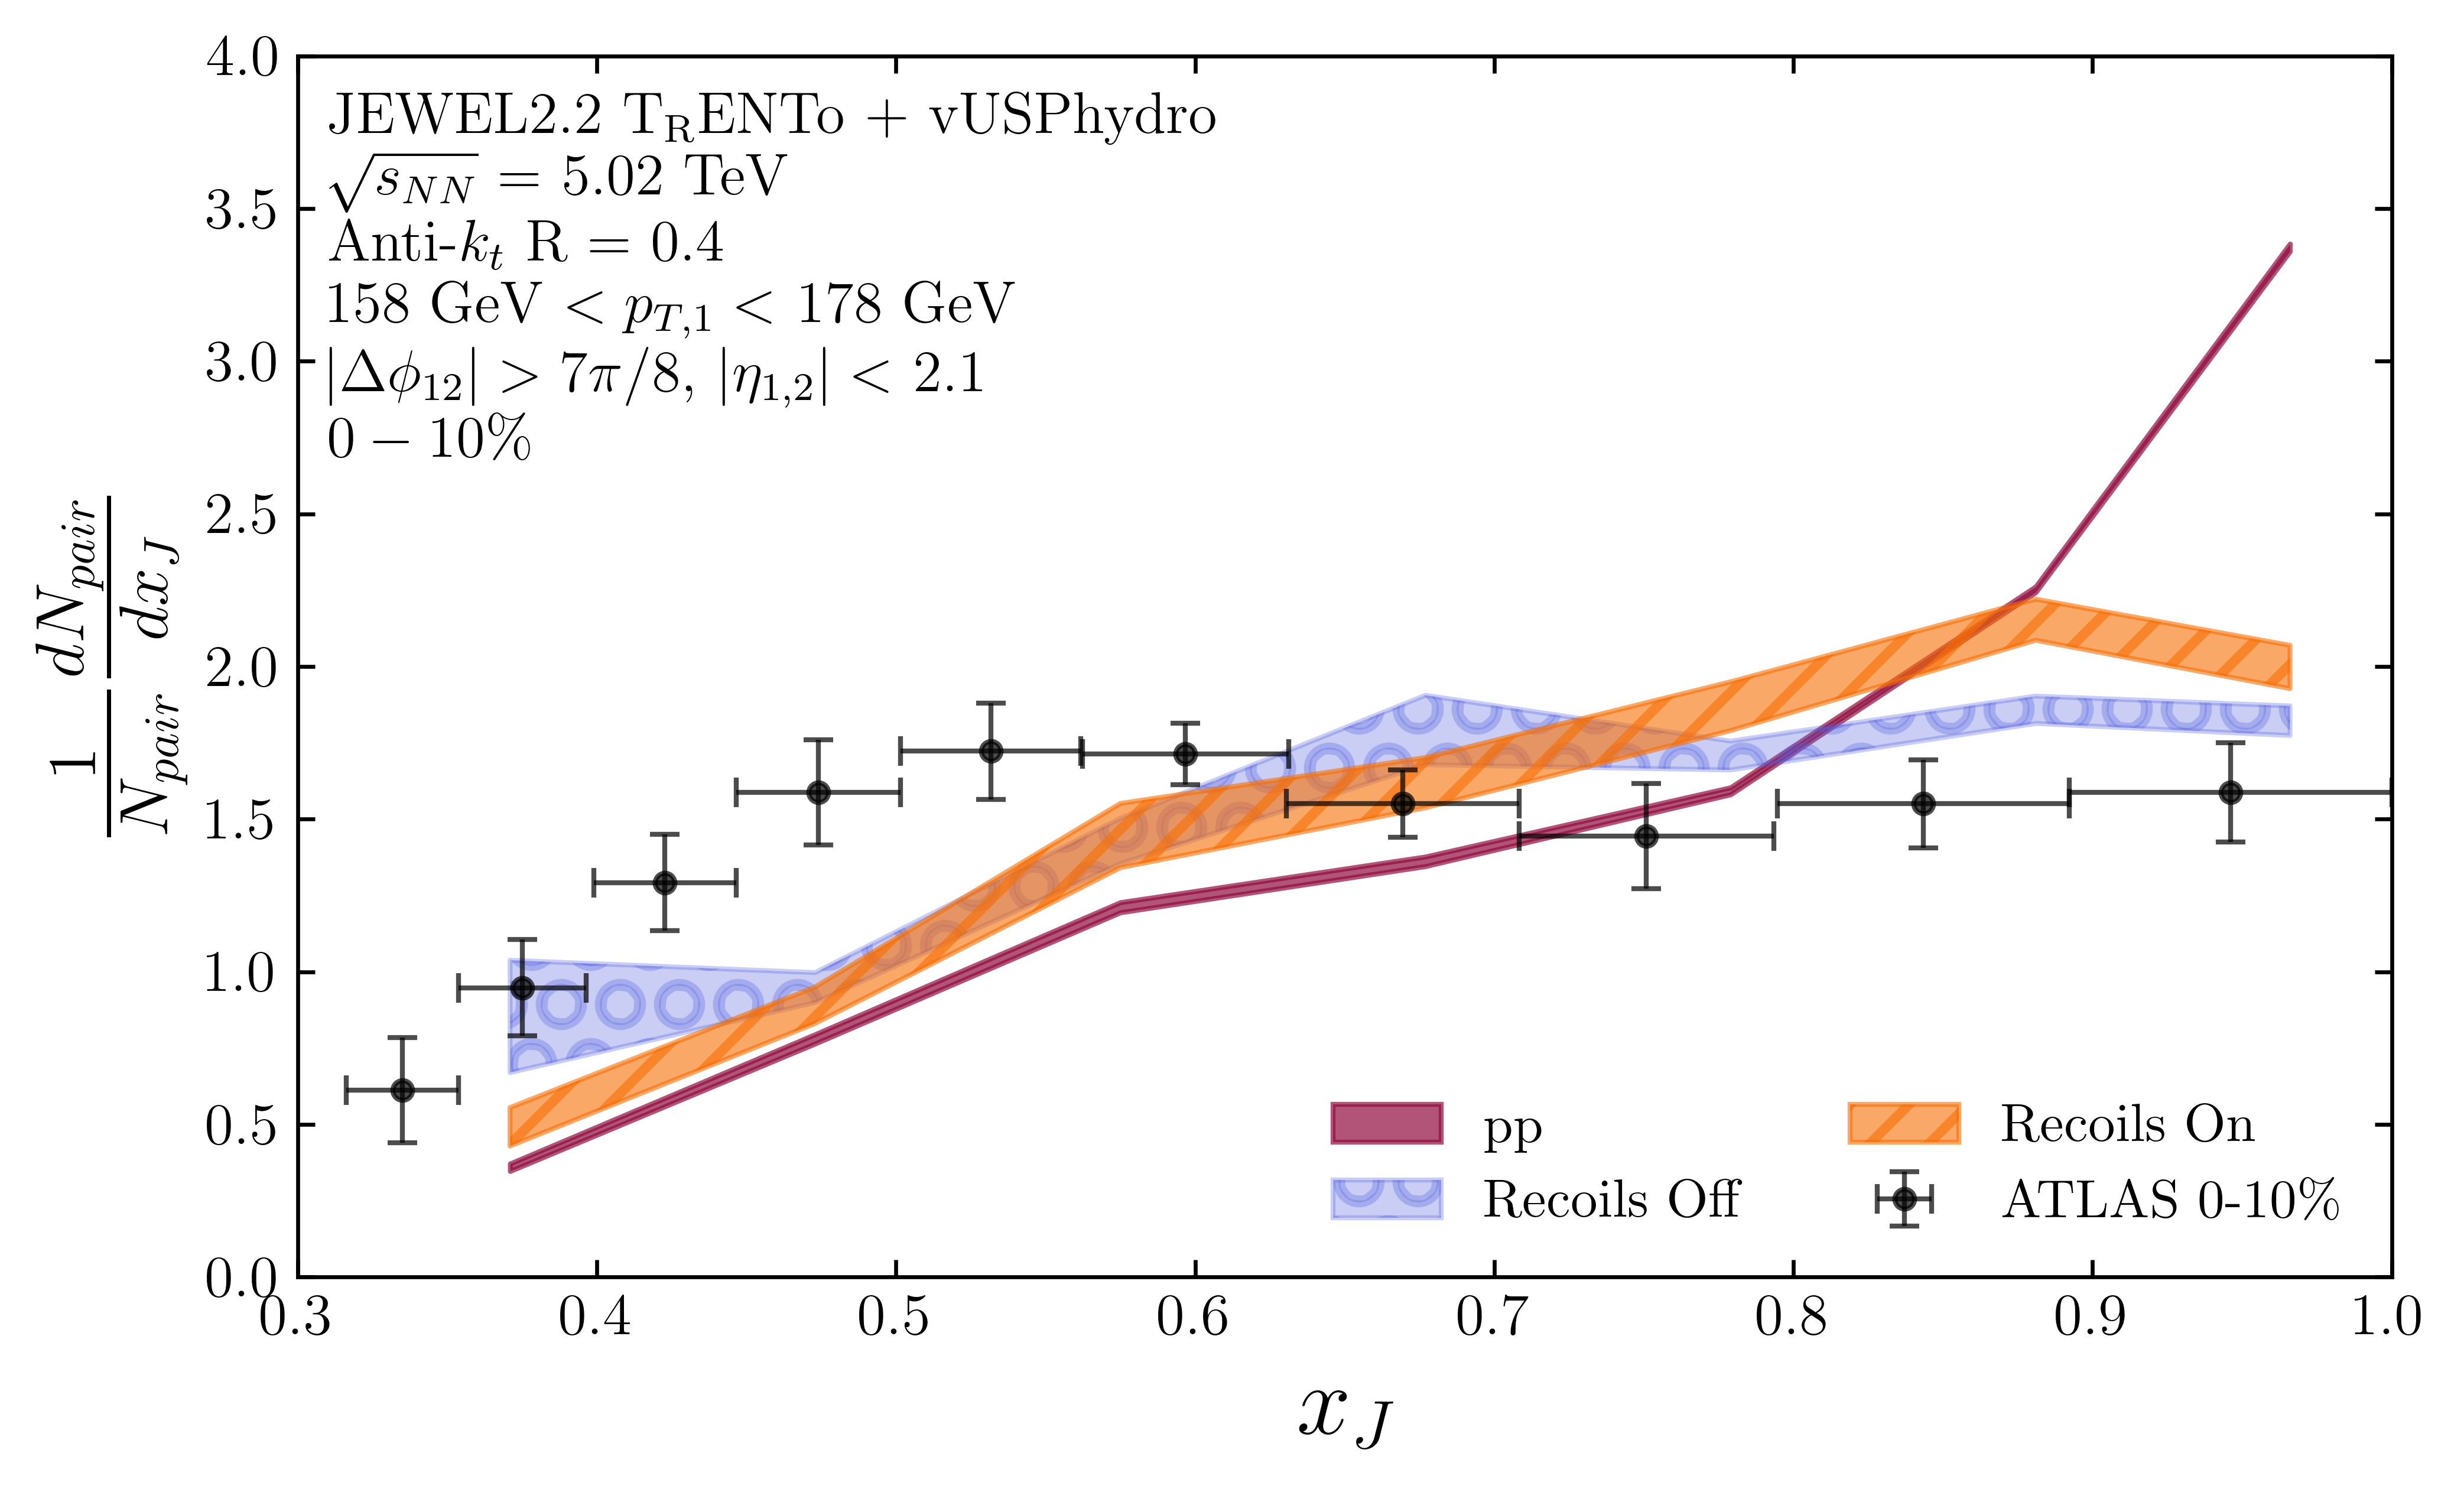

In [3]:
#xj Jewel2.4 vUSP 
import sys
sys.path.append("..")

# Vn analysis, ATLAS and ALICE methods
import jetfunc
import yoda
#import rivet
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from matplotlib.ticker import AutoMinorLocator
import os

plt.style.use('plotconfig.mplstyle')


#função para fazer o gráfico dos dados experimentais do ATLAS
def DataFromExperiment(file, scatter, min = 0, max = 0):
    '''
    Grab data from the Yoda.Scatter2D named scatter from the file yoda, following
    the method that colaborations (ALICE, ATLAS, CMS) save them.

    (str, str) -> (list(np.array))
    '''
    data = yoda.read(file)[scatter]

    if max == 0:
        max = len(data.xVals()) + 1
    
    x = np.asarray(data.xVals())[min:max]
    y = np.asarray(data.yVals())[min:max]
    err = np.asarray((data.yMaxs() - data.yMins()) / 2)[min:max]
    errx = np.asarray((data.xMaxs() - data.xMins()) / 2)[min:max]
    return [x, y, err, errx]



#r = float(sys.argv[1])
#centgroup = int(sys.argv[2])
ptrange = 5
#code = str(sys.argv[4])
model = 4


#r = [0.2,0.3,0.4,0.6,0.8,1.0]
R = 0.4


#energy = os.environ['ENERGY']
#ppfile = r'yoda/pp_1503_jewel2.4_simple_raa_R' + str(R) + '.yoda'
ppfile = r'yoda/pp2_5020/pp220-5vT_raa_R'+str(R)+'.yoda'
nrebin = 3
hatchs = ['O', '//', ' ']

# if centgroup == 1:
#     CENTS = ['0-10', '20-30', '40-50']
#     labels = ['0-10%', '20-30%', '40-50%']
#     colours = ['tab:blue', 'tab:green', 'tab:purple']
# else:
#     CENTS = ['10-20', '30-40', '50-60']
#     labels = ['10-20%', '30-40%', '50-60%']
#     colours = ['tab:orange', 'tab:red', 'tab:brown']

#CENTS = ['0-10', '10-20', '20-40', '40-60']
CENTS = '0-10'
#labels = ['0-10%', '10-20%', '20-40%', '40-60%']
labels = ['Recoils Off', 'Recoils On']
colours = ['#525FE1', '#F86F03']
#colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
alphas = [0.3, 0.6]



XJ = []
XJ.append(jetfunc.XJ(ppfile, ptrange, R, nrebin))


XJ2 = []
XJ3 = []

#XJ2.append(jetfunc.XJ(f'../yoda/{c}_raa_R{r}.yoda', ptrange, r, nrebin))
XJ2.append(jetfunc.XJ(f'yoda/vTj2-5Tworec/'+str(CENTS)+'_raa_R'+str(R)+'.yoda', ptrange, R, nrebin))
#XJ2.append(jetfunc.XJ(f'yoda/flow_Pb_502_0-10_reon_raa_R{r}.yoda', ptrange, r, nrebin))
XJ2.append(jetfunc.XJ(f'yoda/vTj2-5Twrec/'+str(CENTS)+'_raa_R'+str(R)+'.yoda', ptrange, R, nrebin)) #11/08/2023
#XJ2.append(jetfunc.XJ(f'../yoda/simple_1603_jewel2.4_reon_raa_R{r}.yoda', ptrange, r, nrebin))


plt.figure(1)

plt.fill_between(XJ[0][0], XJ[0][1] - XJ[0][2], XJ[0][1] + XJ[0][2], alpha=0.7, label='pp', color='#900C3F')
for i in range(len(XJ2)):
    print('i = ',i)
    plt.fill_between(XJ2[i][0], XJ2[i][1] - XJ2[i][2], XJ2[i][1] + XJ2[i][2], alpha=alphas[i], label=labels[i], color=colours[i], hatch=hatchs[i])
    #plt.fill_between(XJ2[i][0], XJ2[i][1] - XJ2[i][2], XJ2[i][1] + XJ2[i][2], alpha=0.6)
#for i in range(len(XJ3)):
#    plt.fill_between(XJ3[i][0], XJ3[i][1] - XJ3[i][2], XJ3[i][1] + XJ3[i][2], alpha=0.7, label=labels[i], color=colours[i], hatch=hatchs[model - 1])



#Plot dos dados experimentais            
ATLAS = DataFromExperiment('yoda/altas_0-10_158_178.yoda', '/REF/ATLAS_0-10/158-178')

plt.errorbar(*ATLAS, color='k', fmt='o', ms=4, elinewidth = 1., capsize = 3, capthick = 1, alpha=0.7, label='ATLAS 0-10\%')       





# yatlas = np.asarray([0.36, 0.47, 0.45, 0.64, 0.93, 1.20, 1.50, 1.81, 2.095, 2.559])
# xatlas = np.asarray([0.33, 0.376, 0.422, 0.476, 0.526, 0.597, 0.67, 0.75, 0.85, 0.95])

# plt.errorbar(xatlas, yatlas, 0.14*yatlas, fmt='s', color='k', label='ATLAS Exp.')


plt.ylabel(r'$\frac{1}{N_{pair}}\frac{dN_{pair}}{dx_J}$', usetex=True)
plt.xlabel('$x_J$', usetex=True)
plt.ylim(0, 4.)
plt.xlim(0.3, 1.)
jetfunc.TextBoxInfo(0, str(R), XJ[0][4] + '\n' + r'$|\Delta \phi_{12}| > 7 \pi/8$, $|\eta_{1,2}| <$ 2.1 '+ '\n' + '$0-10\%$', 0, 0, model, lead=0)
plt.legend(loc=4, frameon=0, ncol=2)


#plt.savefig('Plots/xjXcentgroup' + str(centgroup) + '_R' + str(r) + '_ptrange_' + str(ptrange) + '_' + str(model) + '.pdf')
plt.savefig('Plots/newdata_xj_vTj2-5T' + '_R' + str(R) + '_ptrange_' + str(ptrange) + '_' + str(model) + '.pdf')
plt.savefig('Plots/newdata_xj_vTj2-5T' + '_R' + str(R) + '_ptrange_' + str(ptrange) + '_' + str(model) + '.png')


Text box info: JEWEL2.2 $\rm T_RENTo$ + vUSPhydro
$\sqrt{s_{NN}}$ = 2.76 TeV
Anti-$k_t$ R = 0.4
100 GeV $< p_{T,1} <$ 126 GeV
$|\Delta \phi_{12}| > 7 \pi/8$, $|\eta_{1,2}| <$ 2.1 
$0-10\%$
Text box info: JEWEL2.2 $\rm T_RENTo$ + vUSPhydro
$\sqrt{s_{NN}}$ = 2.76 TeV
Anti-$k_t$ R = 0.4
100 GeV $< p_{T,1} <$ 126 GeV
$|\Delta \phi_{12}| > 7 \pi/8$, $|\eta_{1,2}| <$ 2.1 
$40-60\%$


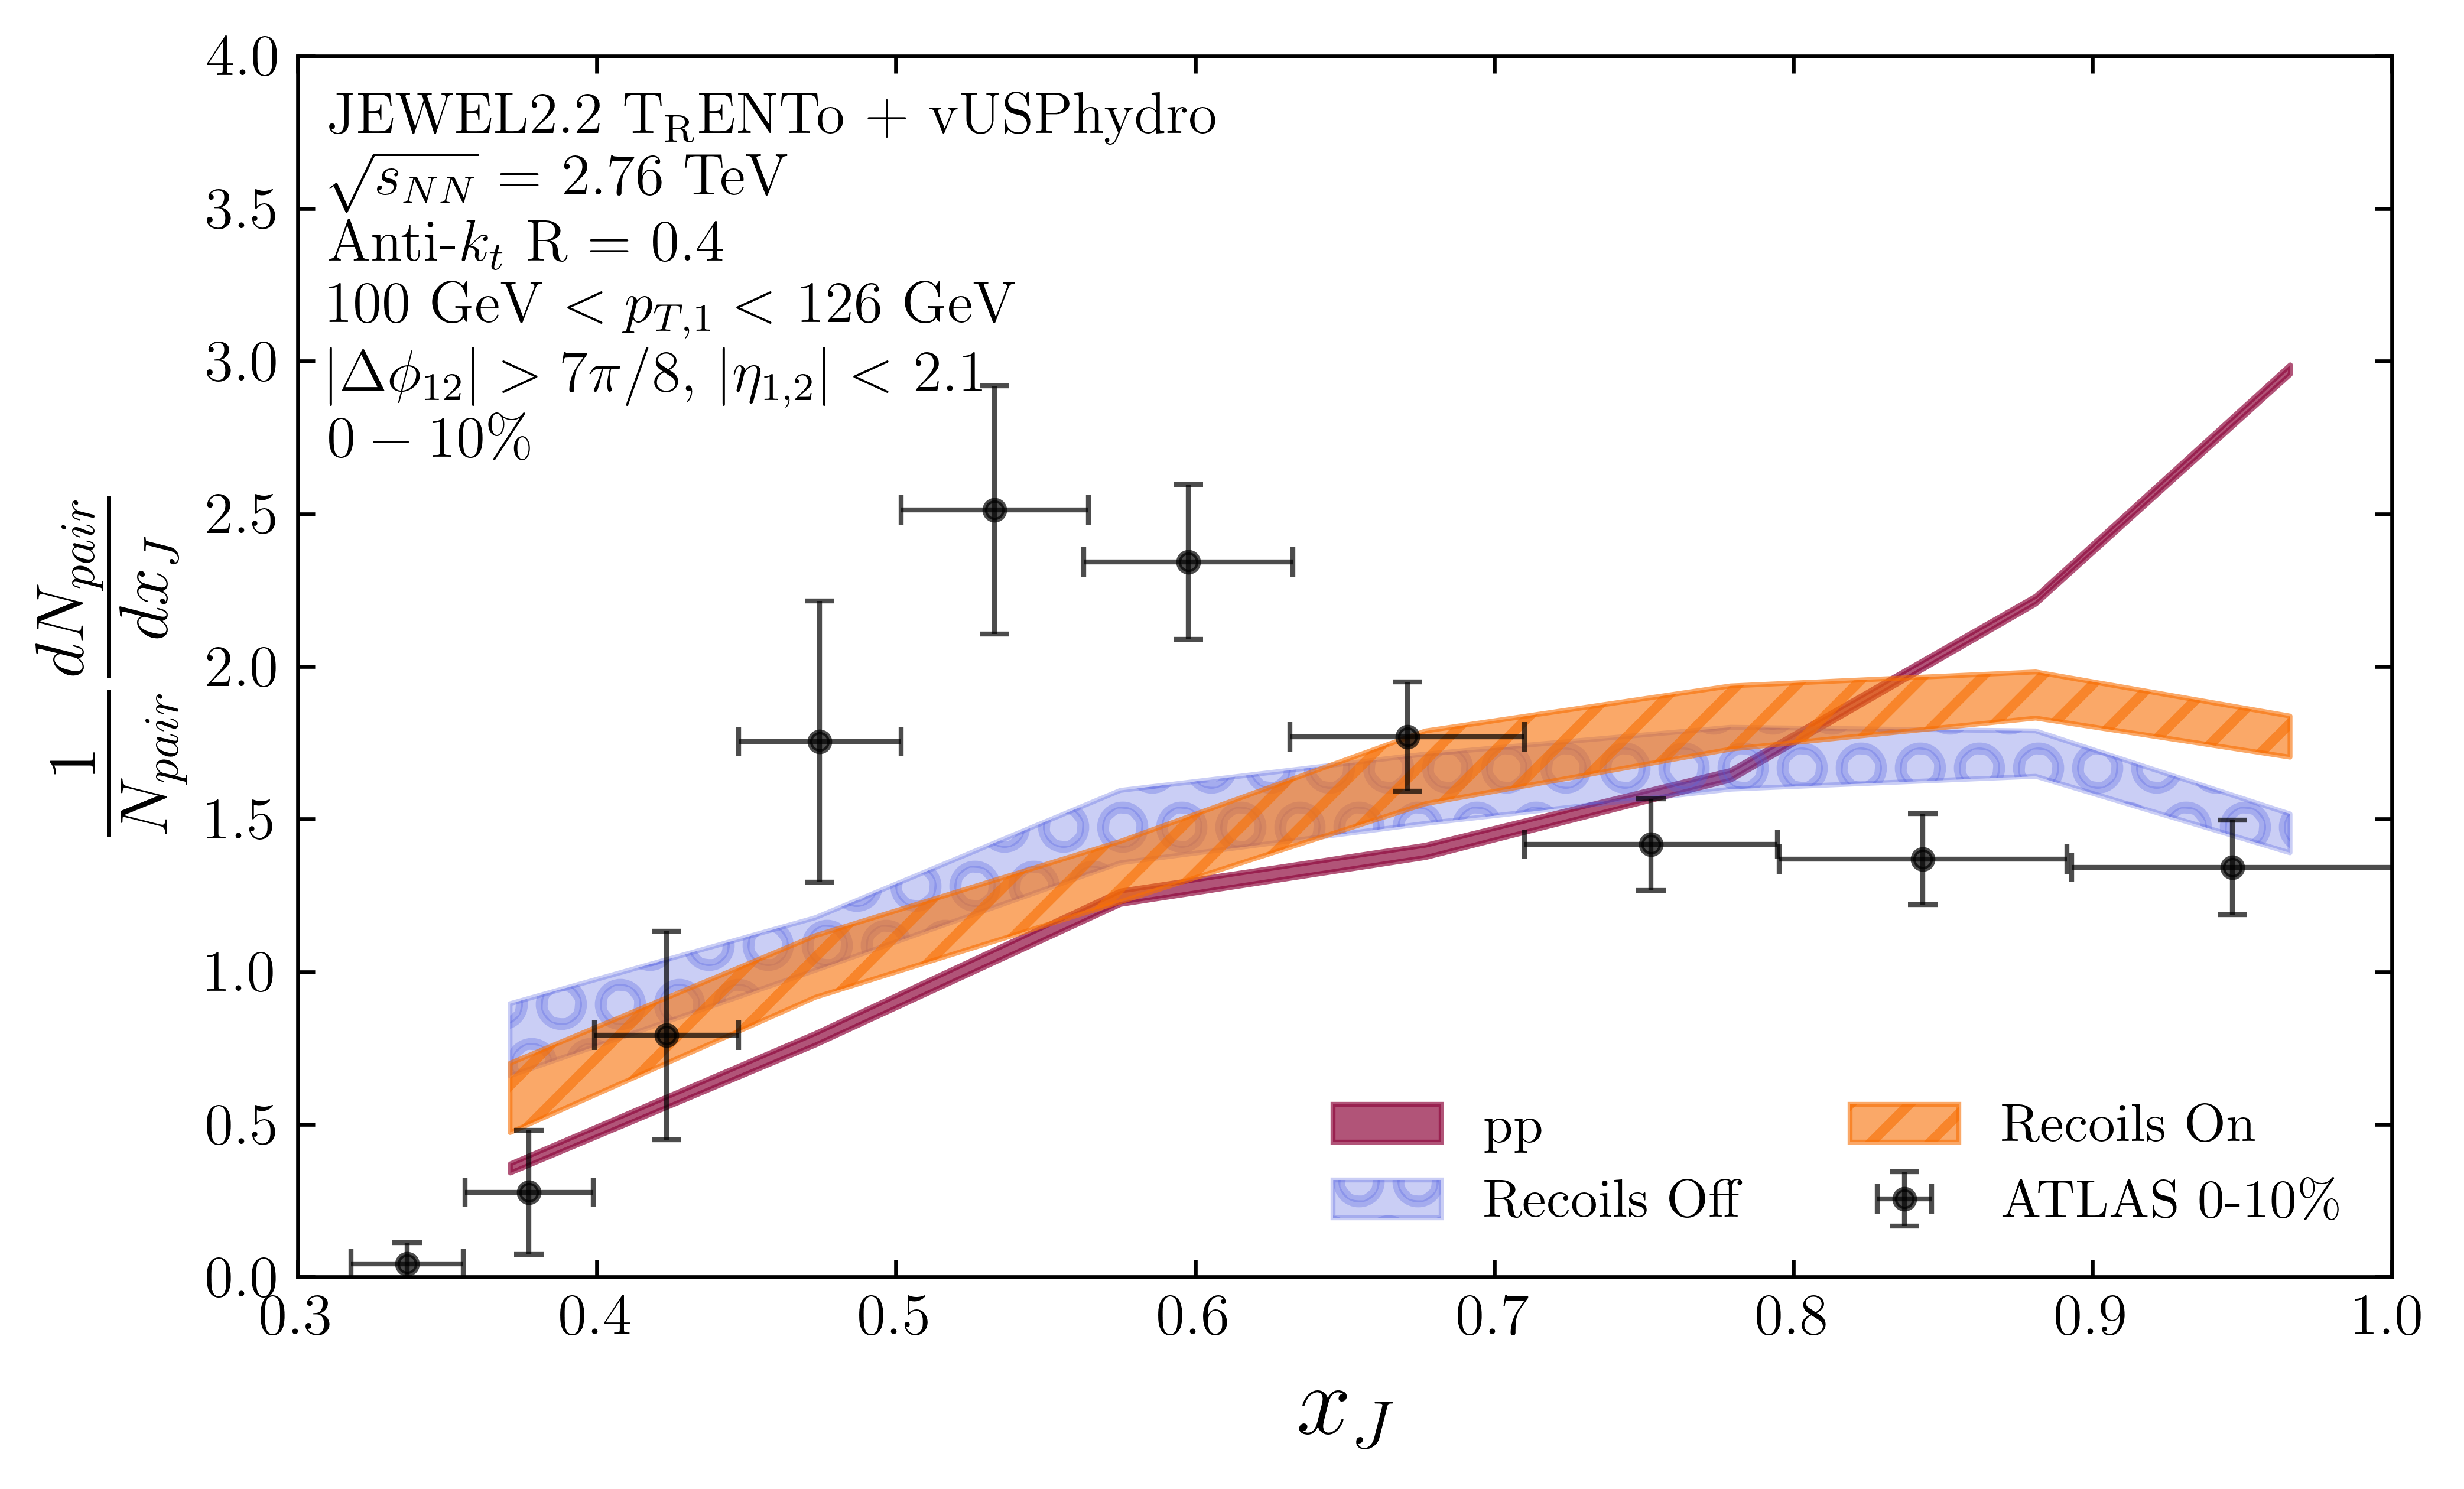

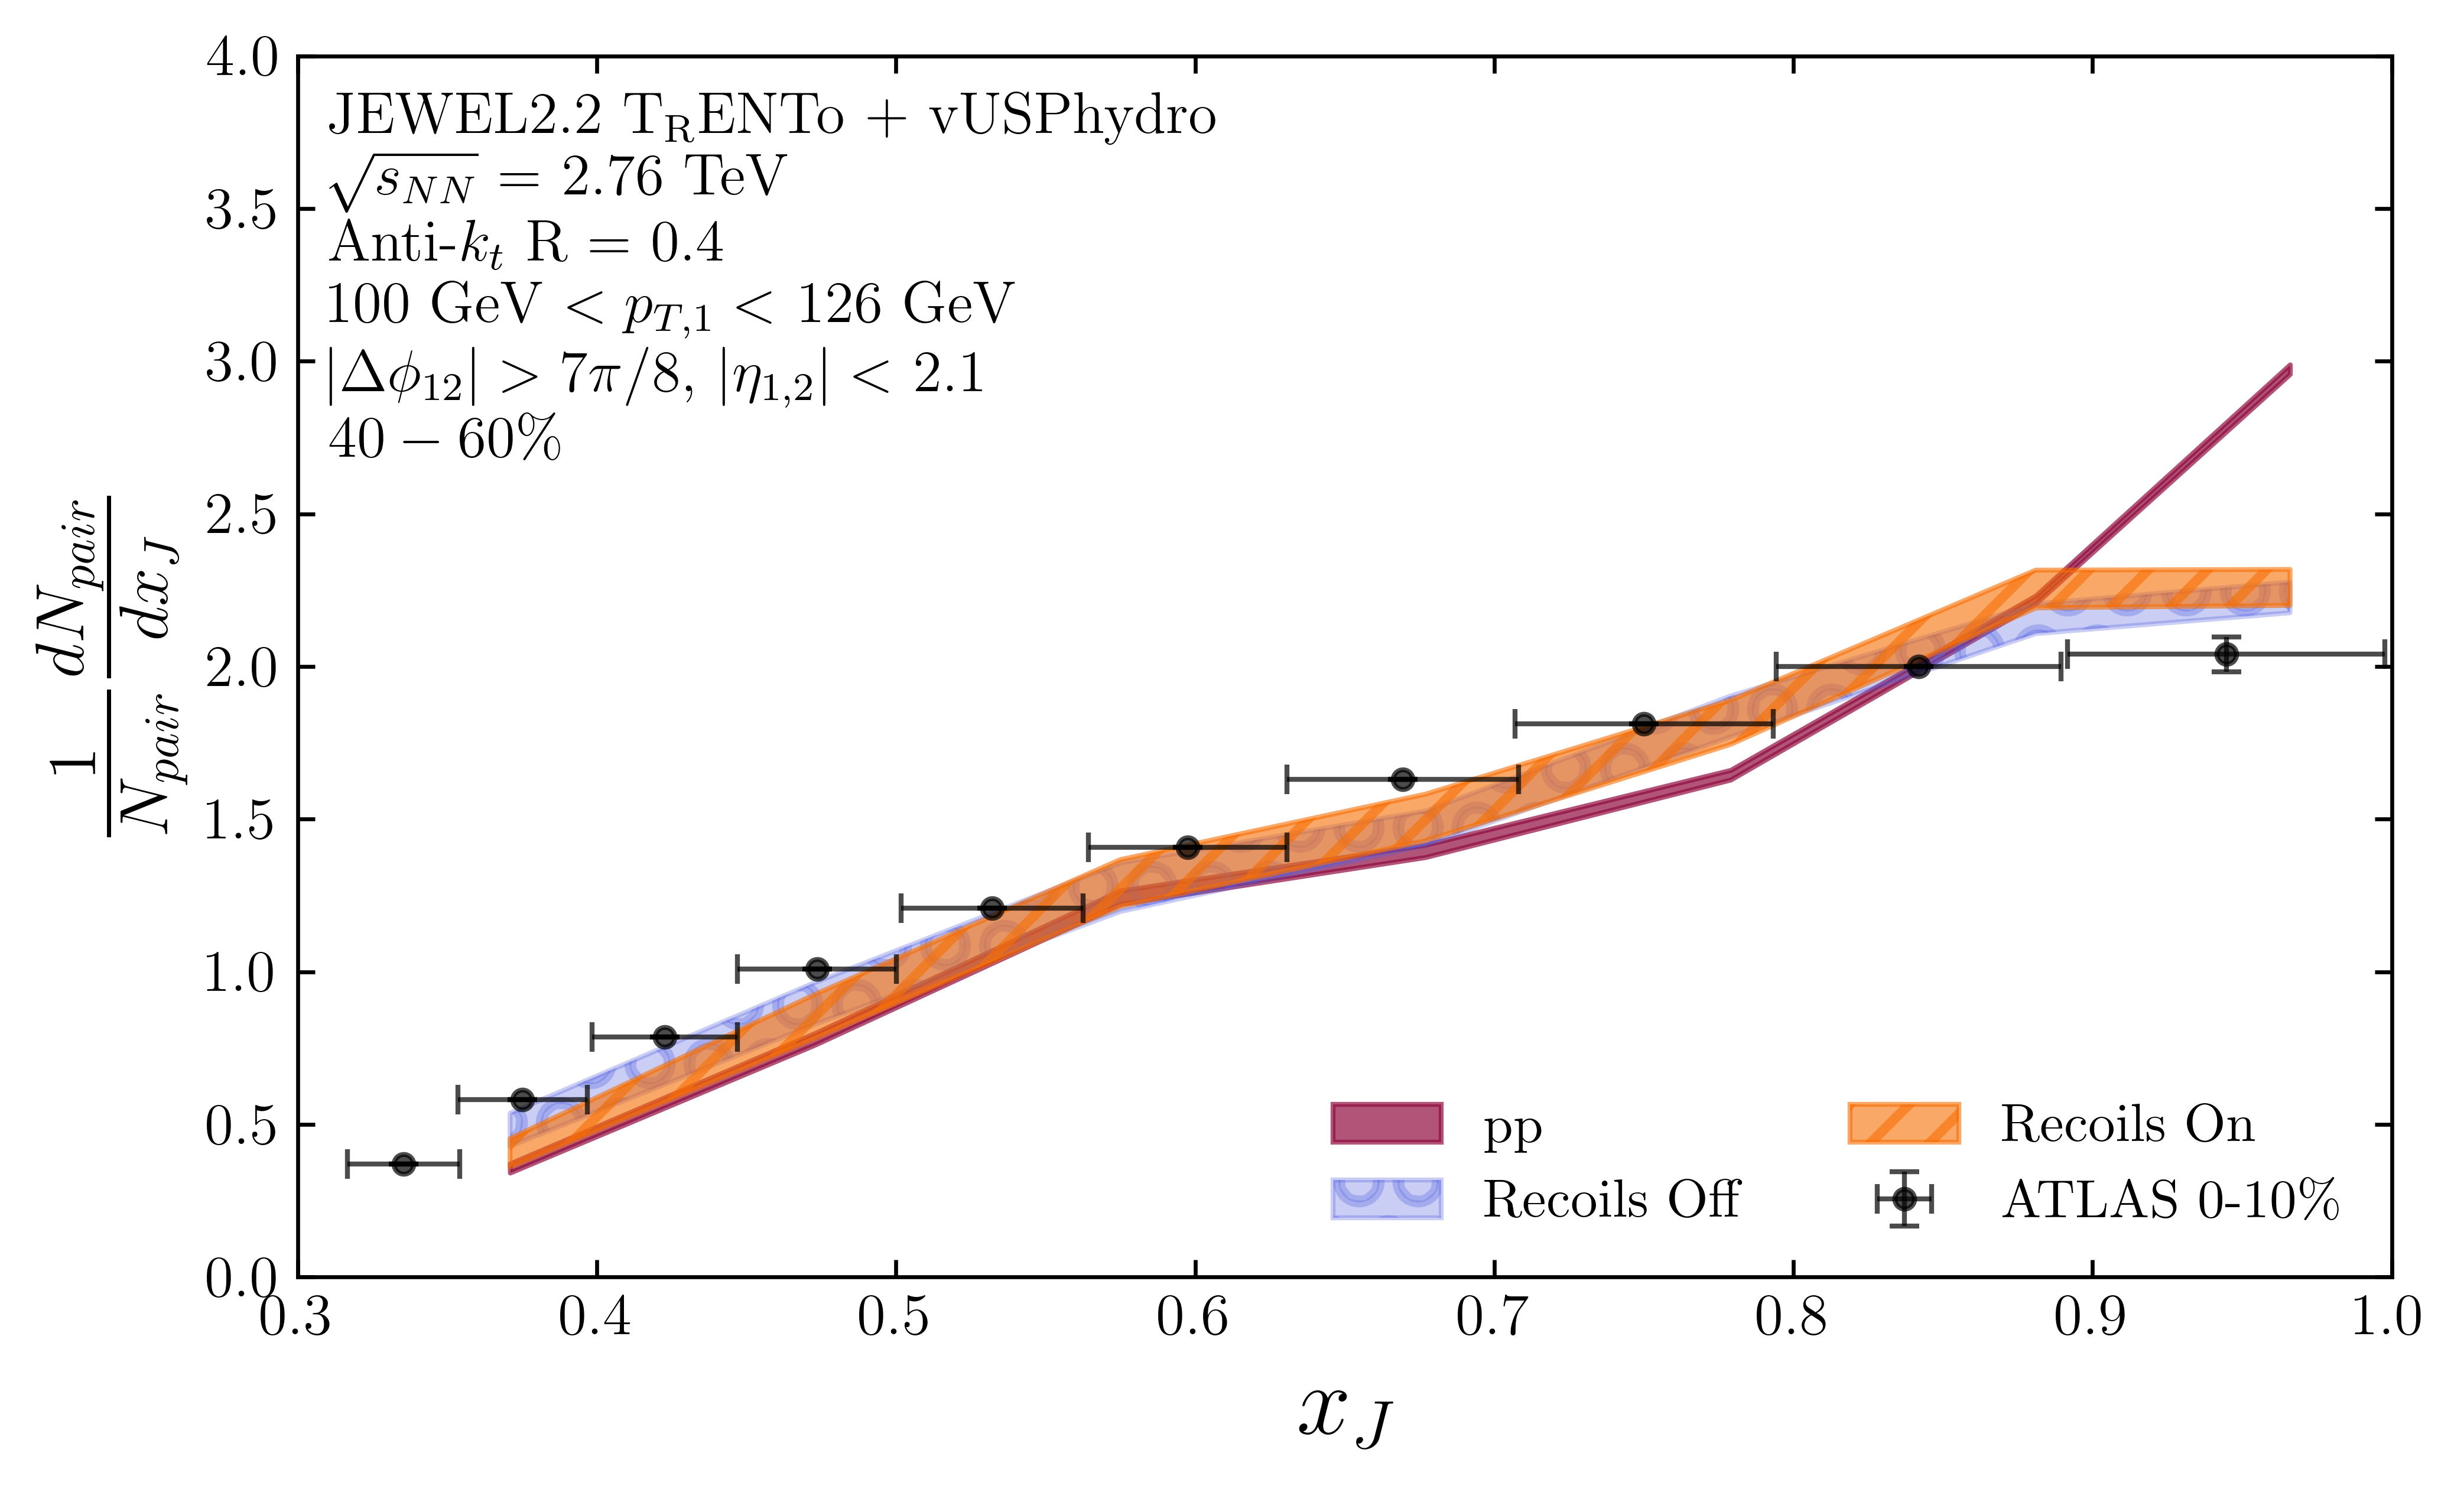

In [10]:
#xj Jewel2.4 vUSP  2.76 pt 100 a 126 

import sys
sys.path.append("..")

# Vn analysis, ATLAS and ALICE methods
import jetfunc
import yoda
#import rivet
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from matplotlib.ticker import AutoMinorLocator
import os

plt.style.use('plotconfig.mplstyle')


#função para fazer o gráfico dos dados experimentais do ATLAS
def DataFromExperiment(file, scatter, min = 0, max = 0):
    '''
    Grab data from the Yoda.Scatter2D named scatter from the file yoda, following
    the method that colaborations (ALICE, ATLAS, CMS) save them.

    (str, str) -> (list(np.array))
    '''
    data = yoda.read(file)[scatter]

    if max == 0:
        max = len(data.xVals()) + 1
    
    x = np.asarray(data.xVals())[min:max]
    y = np.asarray(data.yVals())[min:max]
    err = np.asarray((data.yMaxs() - data.yMins()) / 2)[min:max]
    errx = np.asarray((data.xMaxs() - data.xMins()) / 2)[min:max]
    return [x, y, err, errx]



#r = float(sys.argv[1])
#centgroup = int(sys.argv[2])
ptrange = 6
#code = str(sys.argv[4])
model = 4


#r = [0.2,0.3,0.4,0.6,0.8,1.0]
R = 0.4


#energy = os.environ['ENERGY']
#ppfile = r'yoda/pp_1503_jewel2.4_simple_raa_R' + str(R) + '.yoda'
ppfile = r'yoda/pp2_2760/pp220-2vT_raa_R'+str(R)+'.yoda'
nrebin = 3
hatchs = ['O', '//', ' ']

# if centgroup == 1:
#     CENTS = ['0-10', '20-30', '40-50']
#     labels = ['0-10%', '20-30%', '40-50%']
#     colours = ['tab:blue', 'tab:green', 'tab:purple']
# else:
#     CENTS = ['10-20', '30-40', '50-60']
#     labels = ['10-20%', '30-40%', '50-60%']
#     colours = ['tab:orange', 'tab:red', 'tab:brown']

CENTS = ['0-10', '40-60']
#CENTS = '40-60'
#labels = ['0-10%', '10-20%', '20-40%', '40-60%']
labels = ['Recoils Off', 'Recoils On']
colours = ['#525FE1', '#F86F03']
#colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
alphas = [0.3, 0.6]



XJ = []
XJ.append(jetfunc.XJ(ppfile, ptrange, R, nrebin))


XJ2 = []
XJ3 = []
#old
#XJ2.append(jetfunc.XJ(f'../yoda/{c}_raa_R{r}.yoda', ptrange, r, nrebin))
#XJ2.append(jetfunc.XJ(f'yoda/flow_Pb_502_0-10_reon_raa_R{r}.yoda', ptrange, r, nrebin))
#XJ2.append(jetfunc.XJ(f'../yoda/simple_1603_jewel2.4_reon_raa_R{r}.yoda', ptrange, r, nrebin))
#new
XJ2.append(jetfunc.XJ(f'yoda/vTj2-2Tworec/'+str(CENTS[0])+'_raa_R'+str(R)+'.yoda', ptrange, R, nrebin))
XJ2.append(jetfunc.XJ(f'yoda/vTj2-2Twrec/'+str(CENTS[0])+'_raa_R'+str(R)+'.yoda', ptrange, R, nrebin)) #11/08/2023

plt.figure(1)

plt.fill_between(XJ[0][0], XJ[0][1] - XJ[0][2], XJ[0][1] + XJ[0][2], alpha=0.7, label='pp', color='#900C3F')

for i in range(len(XJ2)):
    plt.fill_between(XJ2[i][0], XJ2[i][1] - XJ2[i][2], XJ2[i][1] + XJ2[i][2], alpha=alphas[i], label=labels[i], color=colours[i], hatch=hatchs[i])       
        
        


#Plot dos dados experimentais            
ATLAS = DataFromExperiment('yoda/ATLASDATA_XJ276_100_126.yoda', '/REF/XJData276/PT_100_126')

plt.errorbar(*ATLAS, color='k', fmt='o', ms=4, elinewidth = 1., capsize = 3, capthick = 1, alpha=0.7, label='ATLAS 0-10\%')       





# yatlas = np.asarray([0.36, 0.47, 0.45, 0.64, 0.93, 1.20, 1.50, 1.81, 2.095, 2.559])
# xatlas = np.asarray([0.33, 0.376, 0.422, 0.476, 0.526, 0.597, 0.67, 0.75, 0.85, 0.95])

# plt.errorbar(xatlas, yatlas, 0.14*yatlas, fmt='s', color='k', label='ATLAS Exp.')


plt.ylabel(r'$\frac{1}{N_{pair}}\frac{dN_{pair}}{dx_J}$', usetex=True)
plt.xlabel('$x_J$', usetex=True)
plt.ylim(0, 4.)
plt.xlim(0.3, 1.)
jetfunc.TextBoxInfo(0, str(R), XJ[0][4] + '\n' + r'$|\Delta \phi_{12}| > 7 \pi/8$, $|\eta_{1,2}| <$ 2.1 '+ '\n' + '$0-10\%$', 0, 0, model, energy=2.76, lead=0)
plt.legend(loc=4, frameon=0, ncol=2)


#plt.savefig('Plots/xjXcentgroup' + str(centgroup) + '_R' + str(r) + '_ptrange_' + str(ptrange) + '_' + str(model) + '.pdf')
plt.savefig('Plots/xj_vTj2-2T' + '_R' + str(R) + '_ptrange_' + str(ptrange) + '_' + str(CENTS[0]) + '.pdf')
plt.savefig('Plots/xj_vTj2-2T' + '_R' + str(R) + '_ptrange_' + str(ptrange) + '_' + str(CENTS[0]) + '.png')


############################## second plot 

XJ3.append(jetfunc.XJ(f'yoda/vTj2-2Tworec/'+str(CENTS[1])+'_raa_R'+str(R)+'.yoda', ptrange, R, nrebin))
XJ3.append(jetfunc.XJ(f'yoda/vTj2-2Twrec/'+str(CENTS[1])+'_raa_R'+str(R)+'.yoda', ptrange, R, nrebin)) 


plt.figure(2)

plt.fill_between(XJ[0][0], XJ[0][1] - XJ[0][2], XJ[0][1] + XJ[0][2], alpha=0.7, label='pp', color='#900C3F')

for j in range(len(XJ3)):
    plt.fill_between(XJ3[j][0], XJ3[j][1] - XJ3[j][2], XJ3[j][1] + XJ3[j][2], alpha=alphas[j], label=labels[j], color=colours[j], hatch=hatchs[j])       
        
        


#Plot dos dados experimentais            
ATLAS = DataFromExperiment('yoda/ATLASDATA_XJ276_40_60c_100_126.yoda', '/REF/XJData276_40_60c/PT_100_126')

plt.errorbar(*ATLAS, color='k', fmt='o', ms=4, elinewidth = 1., capsize = 3, capthick = 1, alpha=0.7, label='ATLAS 0-10\%')       





# yatlas = np.asarray([0.36, 0.47, 0.45, 0.64, 0.93, 1.20, 1.50, 1.81, 2.095, 2.559])
# xatlas = np.asarray([0.33, 0.376, 0.422, 0.476, 0.526, 0.597, 0.67, 0.75, 0.85, 0.95])

# plt.errorbar(xatlas, yatlas, 0.14*yatlas, fmt='s', color='k', label='ATLAS Exp.')


plt.ylabel(r'$\frac{1}{N_{pair}}\frac{dN_{pair}}{dx_J}$', usetex=True)
plt.xlabel('$x_J$', usetex=True)
plt.ylim(0, 4.)
plt.xlim(0.3, 1.)
jetfunc.TextBoxInfo(0, str(R), XJ[0][4] + '\n' + r'$|\Delta \phi_{12}| > 7 \pi/8$, $|\eta_{1,2}| <$ 2.1 '+ '\n' + '$40-60\%$', 0, 0, model, energy=2.76, lead=0)
plt.legend(loc=4, frameon=0, ncol=2)


#plt.savefig('Plots/xjXcentgroup' + str(centgroup) + '_R' + str(r) + '_ptrange_' + str(ptrange) + '_' + str(model) + '.pdf')
plt.savefig('Plots/xj_vTj2-2T' + '_R' + str(R) + '_ptrange_' + str(ptrange) + '_' + str(CENTS[1]) + '.pdf')
plt.savefig('Plots/xj_vTj2-2T' + '_R' + str(R) + '_ptrange_' + str(ptrange) + '_' + str(CENTS[1]) + '.png')


i =  0
i =  1
Text box info: JEWEL2.2+PYTHIA Glauber+Bjorken
$\sqrt{s_{NN}}$ = 2.76 TeV
Anti-$k_t$ R = 0.4
100 GeV $< p_{T,1} <$ 126 GeV
$|\Delta \phi_{12}| > 7 \pi/8$, $|\eta_{1,2}| <$ 2.1 
$0-10\%$
Text box info: JEWEL2.2+PYTHIA Glauber+Bjorken
$\sqrt{s_{NN}}$ = 2.76 TeV
Anti-$k_t$ R = 0.4
100 GeV $< p_{T,1} <$ 126 GeV
$|\Delta \phi_{12}| > 7 \pi/8$, $|\eta_{1,2}| <$ 2.1 
$40-60\%$


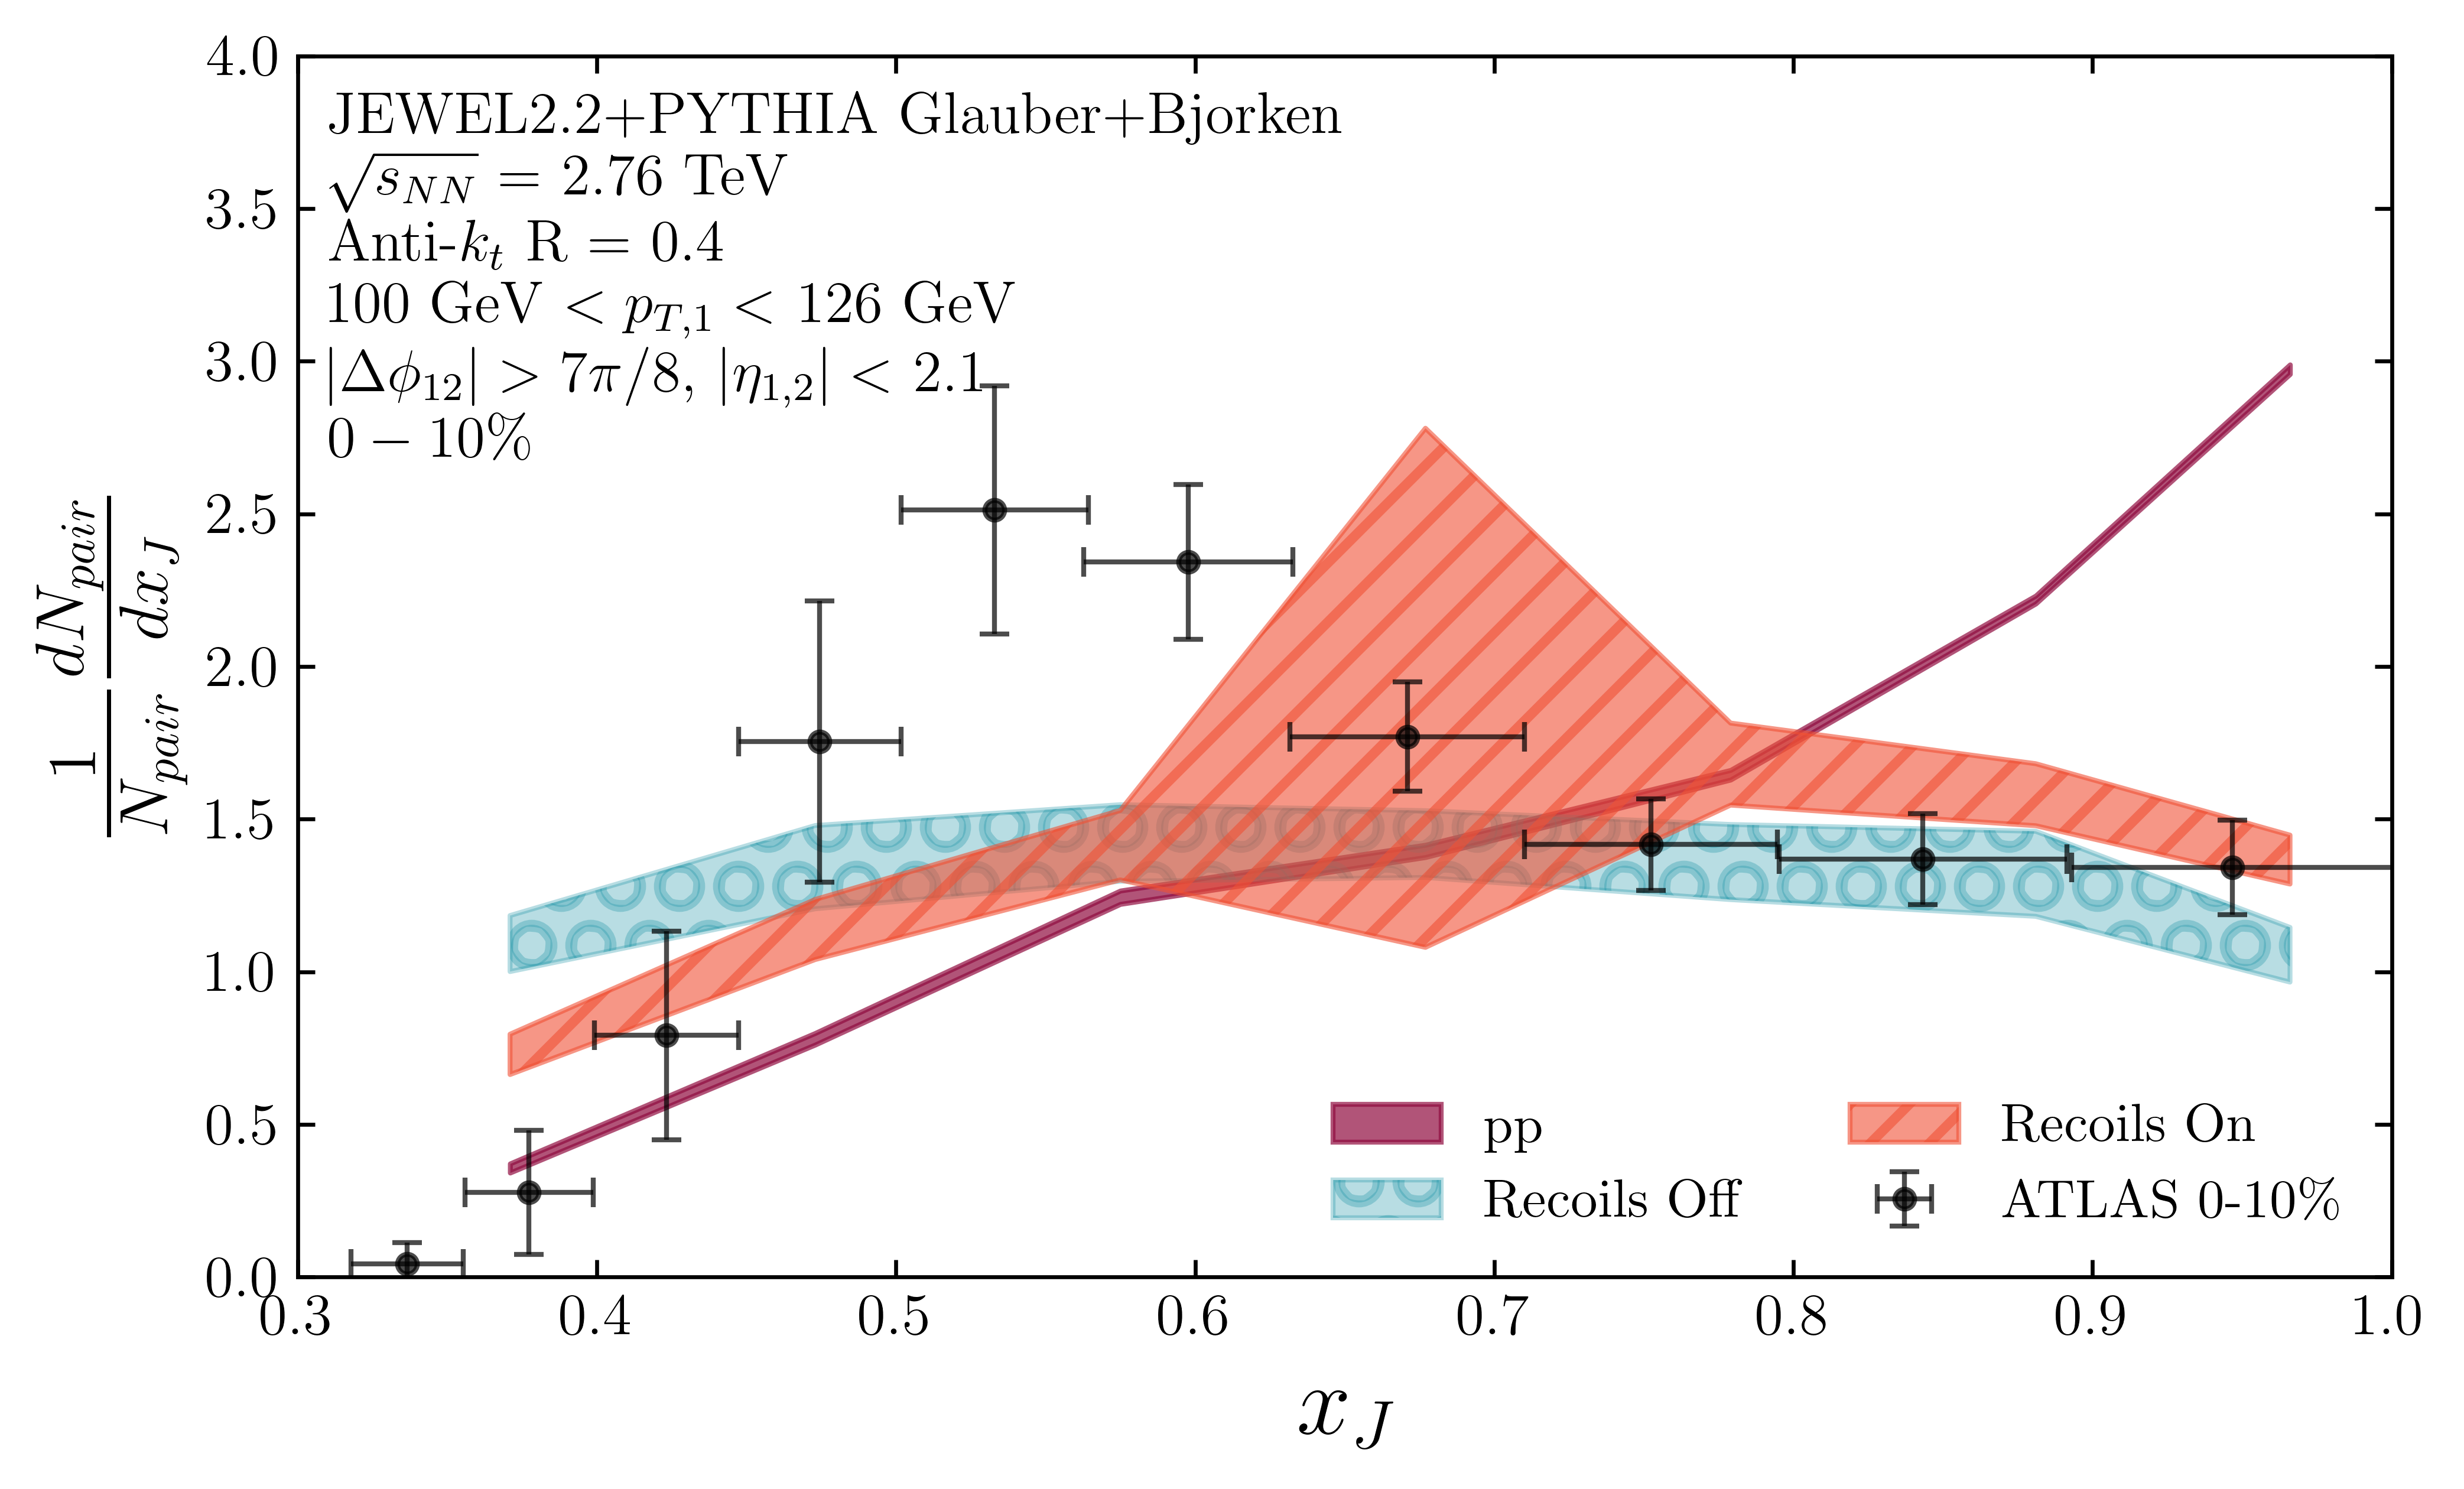

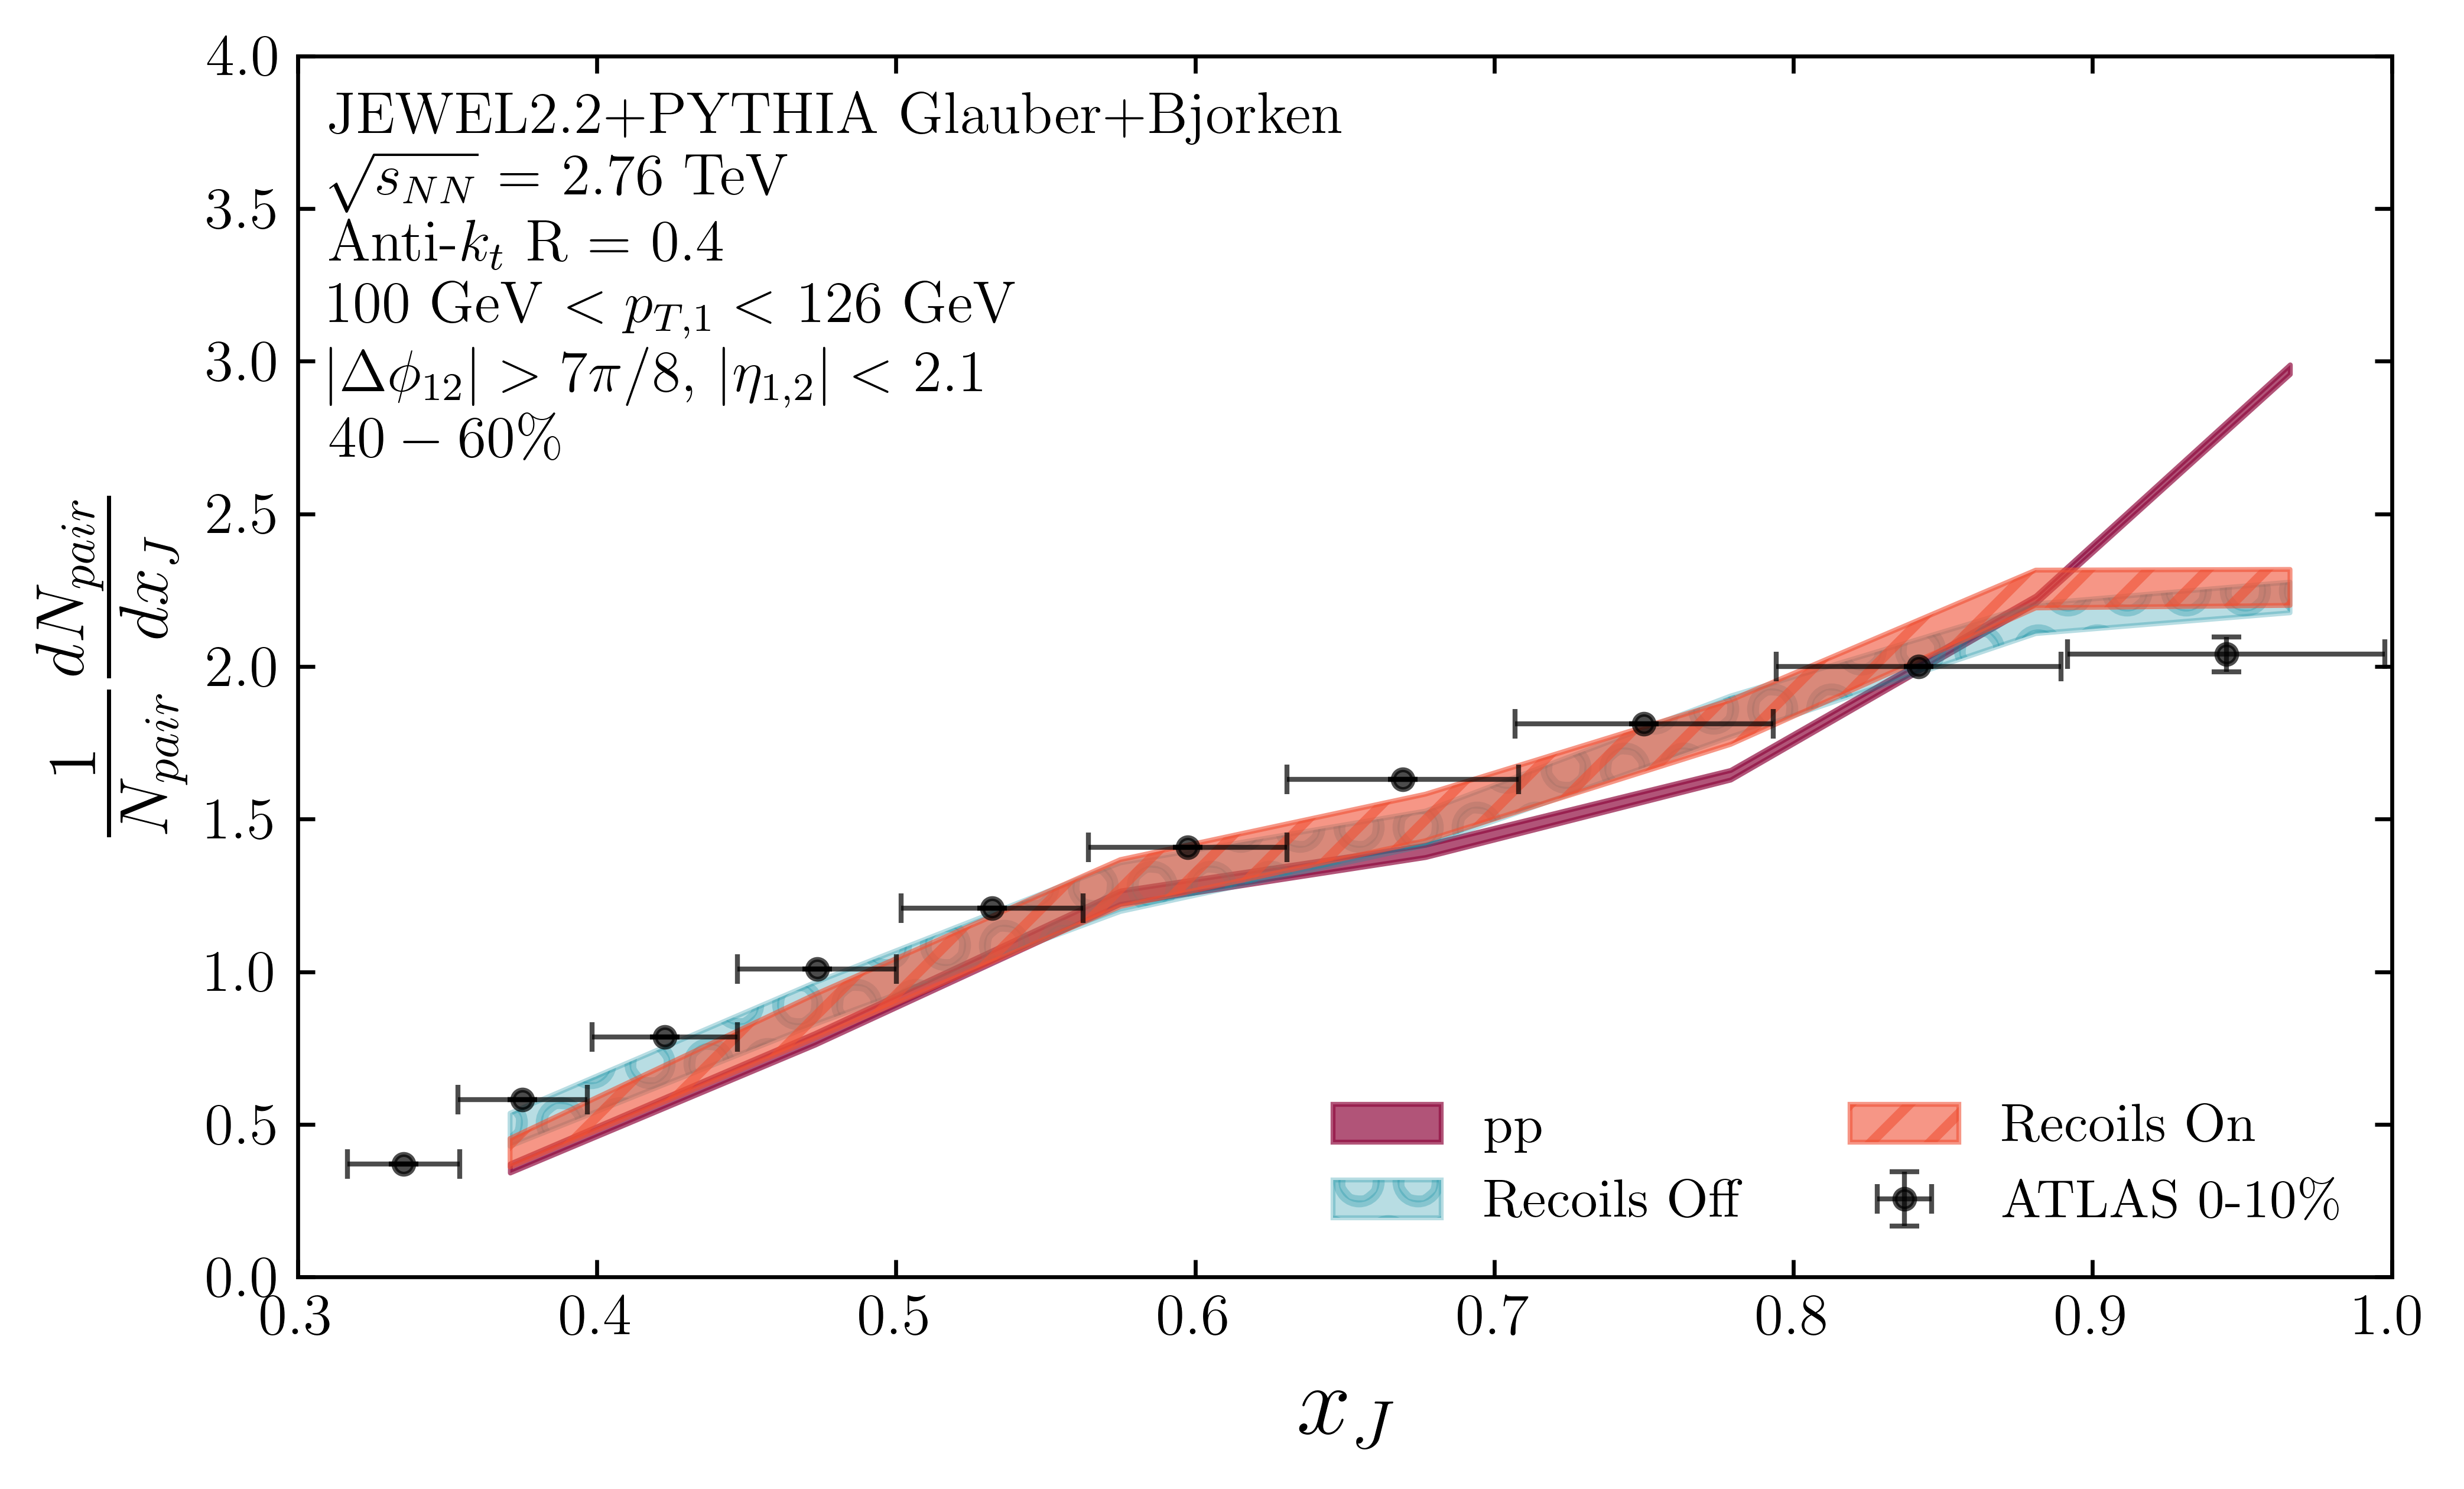

In [11]:
#xj Jewel2.2 deefault 2.76 pt 100 a 126 

import sys
sys.path.append("..")

# Vn analysis, ATLAS and ALICE methods
import jetfunc
import yoda
#import rivet
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from matplotlib.ticker import AutoMinorLocator
import os

plt.style.use('plotconfig.mplstyle')


#função para fazer o gráfico dos dados experimentais do ATLAS
def DataFromExperiment(file, scatter, min = 0, max = 0):
    '''
    Grab data from the Yoda.Scatter2D named scatter from the file yoda, following
    the method that colaborations (ALICE, ATLAS, CMS) save them.

    (str, str) -> (list(np.array))
    '''
    data = yoda.read(file)[scatter]

    if max == 0:
        max = len(data.xVals()) + 1
    
    x = np.asarray(data.xVals())[min:max]
    y = np.asarray(data.yVals())[min:max]
    err = np.asarray((data.yMaxs() - data.yMins()) / 2)[min:max]
    errx = np.asarray((data.xMaxs() - data.xMins()) / 2)[min:max]
    return [x, y, err, errx]



#r = float(sys.argv[1])
#centgroup = int(sys.argv[2])
ptrange = 6
#code = str(sys.argv[4])
model = 1


#r = [0.2,0.3,0.4,0.6,0.8,1.0]
R = 0.4


#energy = os.environ['ENERGY']
#ppfile = r'yoda/pp_1503_jewel2.4_simple_raa_R' + str(R) + '.yoda'
ppfile = r'yoda/pp2_2760/pp220-2vT_raa_R'+str(R)+'.yoda'
nrebin = 3
hatchs = ['O', '//', ' ']

# if centgroup == 1:
#     CENTS = ['0-10', '20-30', '40-50']
#     labels = ['0-10%', '20-30%', '40-50%']
#     colours = ['tab:blue', 'tab:green', 'tab:purple']
# else:
#     CENTS = ['10-20', '30-40', '50-60']
#     labels = ['10-20%', '30-40%', '50-60%']
#     colours = ['tab:orange', 'tab:red', 'tab:brown']

CENTS = ['0-10', '40-60']
#CENTS = '0-10'
#labels = ['0-10%', '10-20%', '20-40%', '40-60%']
labels = ['Recoils Off', 'Recoils On']
colours = ['#1490A3', '#F05135']
#colours = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
alphas = [0.3, 0.6]



XJ = []
XJ.append(jetfunc.XJ(ppfile, ptrange, R, nrebin))


XJ2 = []
XJ3 = []
#old
#XJ2.append(jetfunc.XJ(f'../yoda/{c}_raa_R{r}.yoda', ptrange, r, nrebin))
#XJ2.append(jetfunc.XJ(f'yoda/flow_Pb_502_0-10_reon_raa_R{r}.yoda', ptrange, r, nrebin))
#XJ2.append(jetfunc.XJ(f'../yoda/simple_1603_jewel2.4_reon_raa_R{r}.yoda', ptrange, r, nrebin))
#NEW
XJ2.append(jetfunc.XJ(f'yoda/Dj2-2Tworec/'+str(CENTS[0])+'_raa_R'+str(R)+'.yoda', ptrange, R, nrebin))
XJ2.append(jetfunc.XJ(f'yoda/Dj2-2Twrec/'+str(CENTS[0])+'_raa_R'+str(R)+'.yoda', ptrange, R, nrebin)) #11/08/2023


plt.figure(1)

plt.fill_between(XJ[0][0], XJ[0][1] - XJ[0][2], XJ[0][1] + XJ[0][2], alpha=0.7, label='pp', color='#900C3F')
for i in range(len(XJ2)):
    print('i = ',i)
    plt.fill_between(XJ2[i][0], XJ2[i][1] - XJ2[i][2], XJ2[i][1] + XJ2[i][2], alpha=alphas[i], label=labels[i], color=colours[i], hatch=hatchs[i])



#Plot dos dados experimentais            
ATLAS = DataFromExperiment('yoda/ATLASDATA_XJ276_100_126.yoda', '/REF/XJData276/PT_100_126')

plt.errorbar(*ATLAS, color='k', fmt='o', ms=4, elinewidth = 1., capsize = 3, capthick = 1, alpha=0.7, label='ATLAS 0-10\%')       





# yatlas = np.asarray([0.36, 0.47, 0.45, 0.64, 0.93, 1.20, 1.50, 1.81, 2.095, 2.559])
# xatlas = np.asarray([0.33, 0.376, 0.422, 0.476, 0.526, 0.597, 0.67, 0.75, 0.85, 0.95])

# plt.errorbar(xatlas, yatlas, 0.14*yatlas, fmt='s', color='k', label='ATLAS Exp.')


plt.ylabel(r'$\frac{1}{N_{pair}}\frac{dN_{pair}}{dx_J}$', usetex=True)
plt.xlabel('$x_J$', usetex=True)
plt.ylim(0, 4.)
plt.xlim(0.3, 1.)
jetfunc.TextBoxInfo(0, str(R), XJ[0][4] + '\n' + r'$|\Delta \phi_{12}| > 7 \pi/8$, $|\eta_{1,2}| <$ 2.1 '+ '\n' + '$0-10\%$', 0, 0, model, energy=2.76, lead=0)
plt.legend(loc=4, frameon=0, ncol=2)


#plt.savefig('Plots/xjXcentgroup' + str(centgroup) + '_R' + str(r) + '_ptrange_' + str(ptrange) + '_' + str(model) + '.pdf')
plt.savefig('Plots/xj_Dj2-2T' + '_R' + str(R) + '_ptrange_' + str(ptrange) + '_' +str(CENTS[0])+ '.pdf')
plt.savefig('Plots/xj_Dj2-2T' + '_R' + str(R) + '_ptrange_' + str(ptrange) + '_' +str(CENTS[0])+ '.png')



############################## second plot 

XJ3.append(jetfunc.XJ(f'yoda/vTj2-2Tworec/'+str(CENTS[1])+'_raa_R'+str(R)+'.yoda', ptrange, R, nrebin))
XJ3.append(jetfunc.XJ(f'yoda/vTj2-2Twrec/'+str(CENTS[1])+'_raa_R'+str(R)+'.yoda', ptrange, R, nrebin)) 


plt.figure(2)

plt.fill_between(XJ[0][0], XJ[0][1] - XJ[0][2], XJ[0][1] + XJ[0][2], alpha=0.7, label='pp', color='#900C3F')

for j in range(len(XJ3)):
    plt.fill_between(XJ3[j][0], XJ3[j][1] - XJ3[j][2], XJ3[j][1] + XJ3[j][2], alpha=alphas[j], label=labels[j], color=colours[j], hatch=hatchs[j])       
        
        


#Plot dos dados experimentais            
ATLAS = DataFromExperiment('yoda/ATLASDATA_XJ276_40_60c_100_126.yoda', '/REF/XJData276_40_60c/PT_100_126')

plt.errorbar(*ATLAS, color='k', fmt='o', ms=4, elinewidth = 1., capsize = 3, capthick = 1, alpha=0.7, label='ATLAS 0-10\%')       





# yatlas = np.asarray([0.36, 0.47, 0.45, 0.64, 0.93, 1.20, 1.50, 1.81, 2.095, 2.559])
# xatlas = np.asarray([0.33, 0.376, 0.422, 0.476, 0.526, 0.597, 0.67, 0.75, 0.85, 0.95])

# plt.errorbar(xatlas, yatlas, 0.14*yatlas, fmt='s', color='k', label='ATLAS Exp.')


plt.ylabel(r'$\frac{1}{N_{pair}}\frac{dN_{pair}}{dx_J}$', usetex=True)
plt.xlabel('$x_J$', usetex=True)
plt.ylim(0, 4.)
plt.xlim(0.3, 1.)
jetfunc.TextBoxInfo(0, str(R), XJ[0][4] + '\n' + r'$|\Delta \phi_{12}| > 7 \pi/8$, $|\eta_{1,2}| <$ 2.1 '+ '\n' + '$40-60\%$', 0, 0, model, energy=2.76, lead=0)
plt.legend(loc=4, frameon=0, ncol=2)


#plt.savefig('Plots/xjXcentgroup' + str(centgroup) + '_R' + str(r) + '_ptrange_' + str(ptrange) + '_' + str(model) + '.pdf')
plt.savefig('Plots/xj_Dj2-2T' + '_R' + str(R) + '_ptrange_' + str(ptrange) + '_' + str(CENTS[1]) + '.pdf')
plt.savefig('Plots/xj_Dj2-2T' + '_R' + str(R) + '_ptrange_' + str(ptrange) + '_' + str(CENTS[1]) + '.png')
